In [3]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm  # statsmodels  

In [13]:
df =  pd.read_csv("electric.csv", index_col=0)
df.head()


,IPG2211A2N
DATE,
1985-01-01,72.6803
1985-02-01,70.8479
1985-03-01,62.6166
1985-04-01,57.6106
1985-05-01,55.4467


In [10]:
df.index.min()

'1985-01-01'

In [11]:
df.index.max()

'2020-01-01'

In [14]:
df.index

Index(['1985-01-01', '1985-02-01', '1985-03-01', '1985-04-01', '1985-05-01',
       '1985-06-01', '1985-07-01', '1985-08-01', '1985-09-01', '1985-10-01',
       ...
       '2019-04-01', '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
       '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01'],
      dtype='object', name='DATE', length=421)

In [15]:
df.shape

(421, 1)

In [17]:
df.index = pd.to_datetime(df.index)  #### This is very imp - >>> Date or Datetime as index -- convert that into proper datetime


# pd.to_datetime

In [18]:
df.index

DatetimeIndex(['1985-01-01', '1985-02-01', '1985-03-01', '1985-04-01',
               '1985-05-01', '1985-06-01', '1985-07-01', '1985-08-01',
               '1985-09-01', '1985-10-01',
               ...
               '2019-04-01', '2019-05-01', '2019-06-01', '2019-07-01',
               '2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01',
               '2019-12-01', '2020-01-01'],
              dtype='datetime64[ns]', name='DATE', length=421, freq=None)

In [19]:
df.columns = ['Energy Production']
df.head()

,Energy Production
DATE,
1985-01-01,72.6803
1985-02-01,70.8479
1985-03-01,62.6166
1985-04-01,57.6106
1985-05-01,55.4467


In [43]:
# Date component should be in the index of the dataframe
# The index should be in pandas date-time format

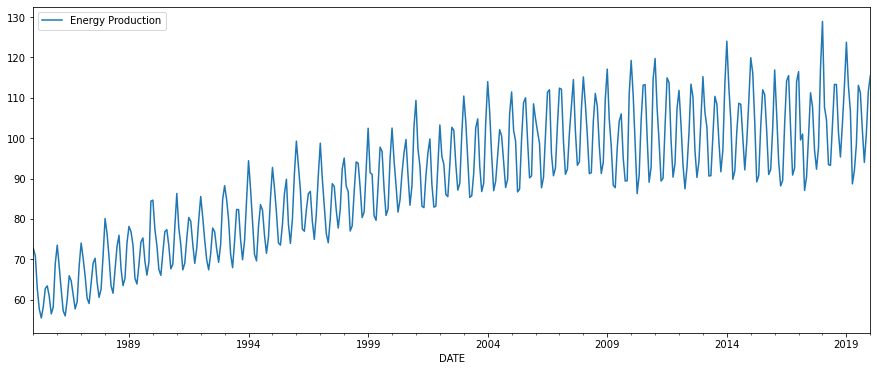

In [20]:
df.plot(figsize = (15,6))

In [71]:
# Decompostion of time series 


# Trend , Seasonality etc. 


## Will you have do it by writing your own function - NO 


# sm.tsa.seasonal_decompose
#df


# Residuals 


# Actual Predicted 

# Residuals or error - Acutal - Predicted

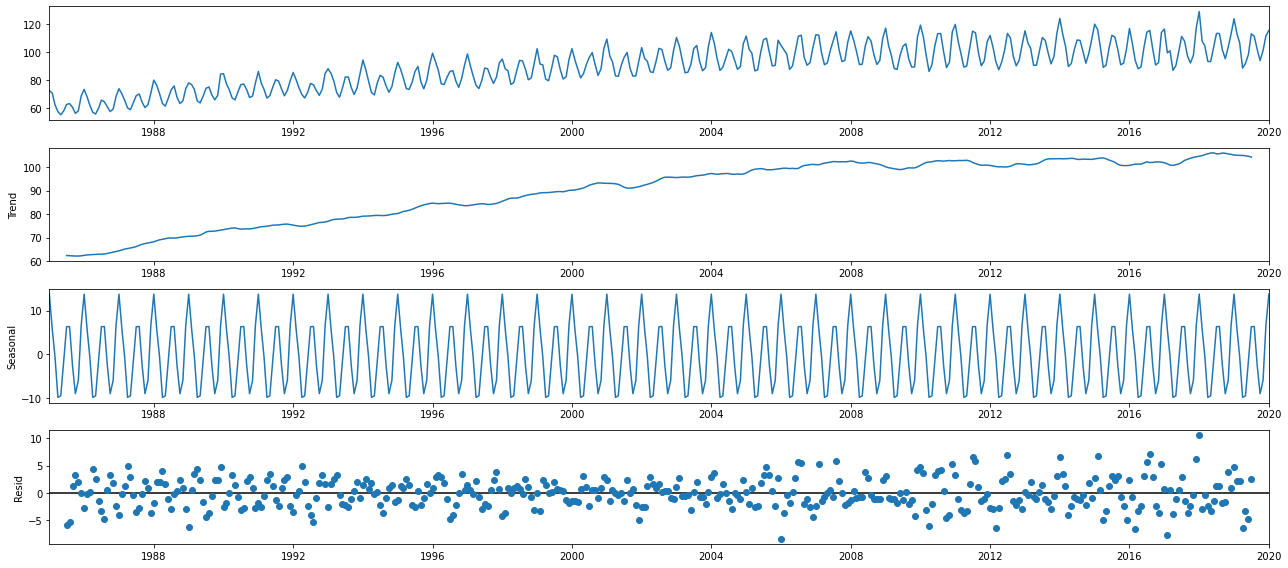

In [72]:
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 18,8
decomposition = sm.tsa.seasonal_decompose(df, model = "additive")
fig = decomposition.plot()

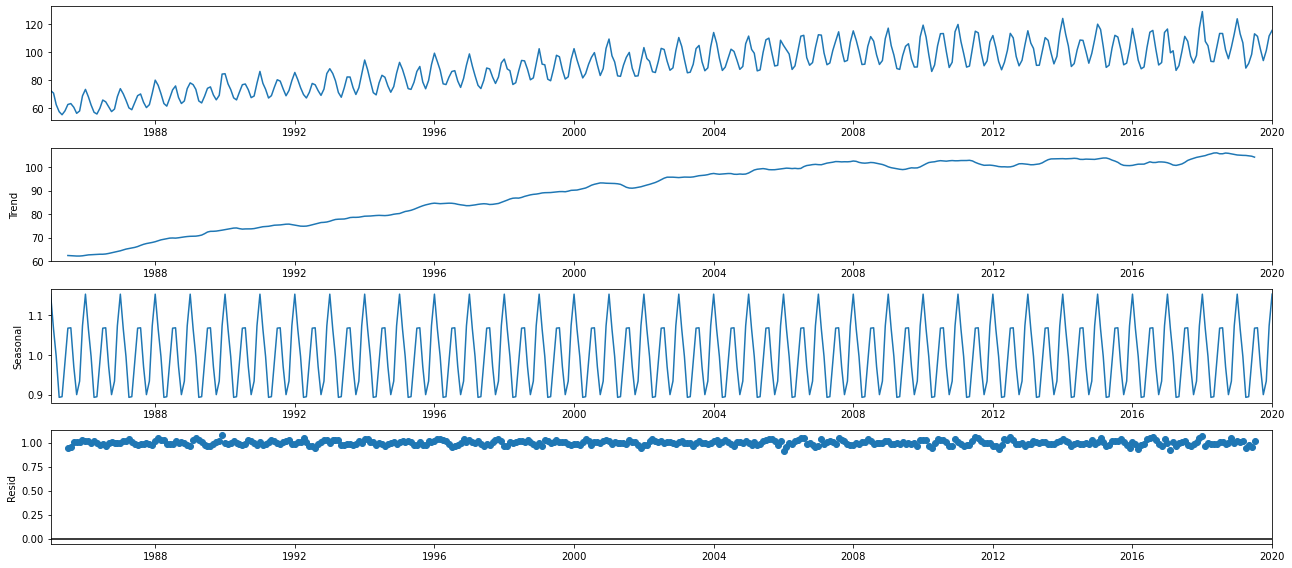

In [73]:
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 18,8
decomposition = sm.tsa.seasonal_decompose(df, model = "multiplicative")
fig = decomposition.plot()

## Simple Moving Average Model

In [22]:
df.head(n=20)

,Energy Production
DATE,
1985-01-01,72.6803
1985-02-01,70.8479
1985-03-01,62.6166
1985-04-01,57.6106
1985-05-01,55.4467
1985-06-01,58.2228
1985-07-01,62.7591
1985-08-01,63.3921
1985-09-01,60.7507


In [ ]:
## Window Funcntion in pandas 

In [23]:
df_ma = df.copy()

# windows function 

# rolling 


df_ma['SMA_12'] = df_ma.rolling(window = 12).mean()
df_ma.head(20)

,Energy Production,SMA_12
DATE,,
1985-01-01,72.6803,NaN
1985-02-01,70.8479,NaN
1985-03-01,62.6166,NaN
1985-04-01,57.6106,NaN
1985-05-01,55.4467,NaN
1985-06-01,58.2228,NaN
1985-07-01,62.7591,NaN
1985-08-01,63.3921,NaN
1985-09-01,60.7507,NaN


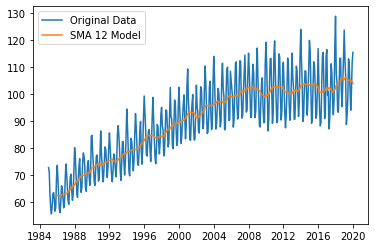

In [26]:
plt.plot(df_ma['Energy Production'], label = 'Original Data')
plt.plot(df_ma['SMA_12'], label = "SMA 12 Model")
plt.legend()

In [27]:
## Acutual - Predicted 


# mape - Mean absolute percentage error 


#Mean(AbS(( A - P) A )*100




def mape(y_true, y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true)) *100



In [28]:
mape(df_ma['Energy Production'], df_ma['SMA_12'])

7.326451614735856

## Stationarity Check using ADF TEST

In [ ]:
# NULL HYPOTHESIS - Time Series is not stationary

# Alternate Hypthesis  - Time Series is  stationary


# p value > 0.05 --- >> yu fail to reject null hypeothesis 

In [29]:
import statsmodels.tsa.stattools as ts

adf_test = ts.adfuller(df)

print("p-value % 0.04f" % adf_test[1])

p-value  0.0873


- Null: Time Series is not stationary
- Alternate: Time Series is Stationary

Faile to reject Null. Conclude that my time series is not stationary

In [30]:
df.head()

,Energy Production
DATE,
1985-01-01,72.6803
1985-02-01,70.8479
1985-03-01,62.6166
1985-04-01,57.6106
1985-05-01,55.4467


In [ ]:
# Timeseries is NON Stanionary 


#  I convert this to stantionary --- >>>>>> detrending , transformations maths , etc.

In [31]:
df.head()

,Energy Production
DATE,
1985-01-01,72.6803
1985-02-01,70.8479
1985-03-01,62.6166
1985-04-01,57.6106
1985-05-01,55.4467


In [33]:
62.6166 - 70.8479 


-8.231299999999997

In [35]:
# Let's a one order differencing


df_1 =     df.diff()

df_1.head()

# df  - df_1 by doing one order difference - in hope that this will make my TS stationary 

,Energy Production
DATE,
1985-01-01,NaN
1985-02-01,-1.8324
1985-03-01,-8.2313
1985-04-01,-5.0060
1985-05-01,-2.1639


In [36]:
df_1.dropna(inplace=True)

In [38]:
import statsmodels.tsa.stattools as ts

adf_test = ts.adfuller(df_1)

print("p-value % 0.04f" % adf_test[1])

p-value  0.0000


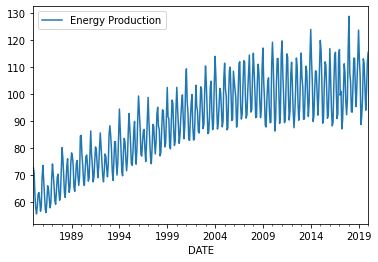

In [40]:
df.plot()

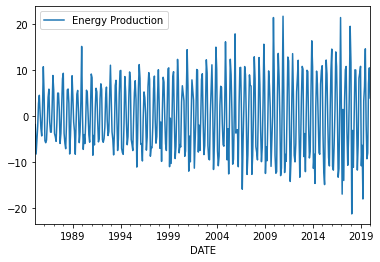

In [39]:
df_1.plot()